In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('creditcard.csv')

#### Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [6]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
df.shape

(284807, 31)

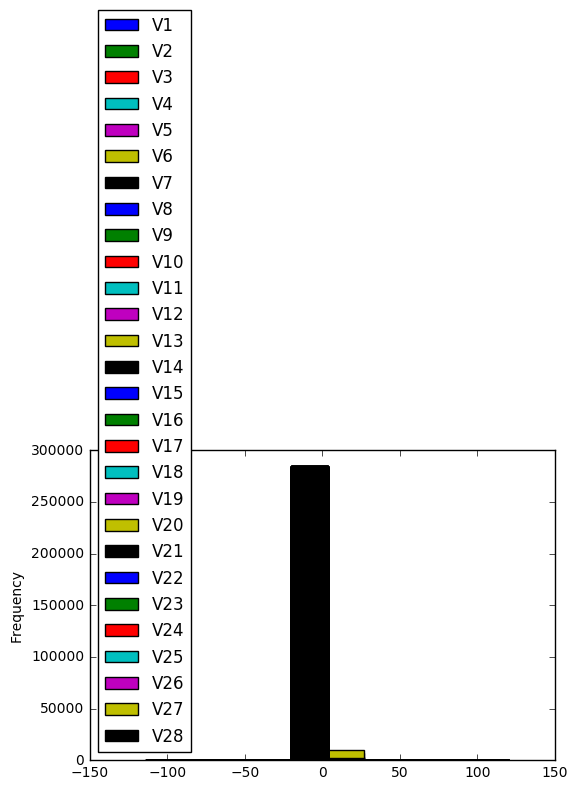

In [8]:
dfspecial = df.drop(['Time', 'Class', 'Amount'], axis=1)
dfspecial.plot.hist()

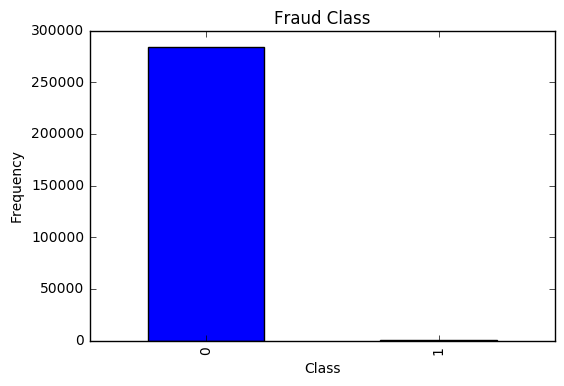

In [9]:
count_class = pd.value_counts(df['Class'], sort=True).sort_index()
count_class.plot(kind='bar')
plt.title('Fraud Class')
plt.xlabel('Class')
plt.ylabel('Frequency')

#### ^^^ Nothing stands out on features

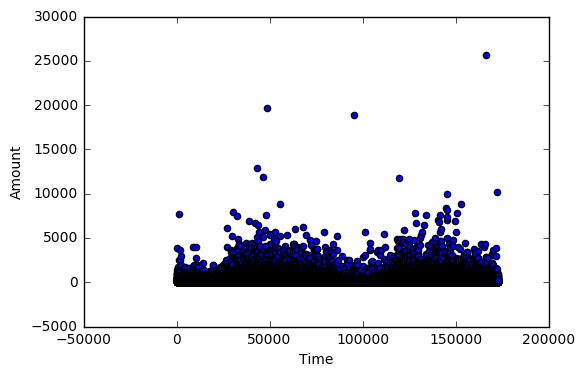

In [10]:
df.plot.scatter(x ='Time',y='Amount')

#### ^^^ No relationship between time vs. amount....and therefore class

In [11]:
print (df.columns.values)
cols = ['Time', 'Amount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'
, 'V13', 'V14', 'V15', 'V16', 'V17', 'V18' ,'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
 'V25', 'V26', 'V27', 'V28']
df = df[cols]


['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [12]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

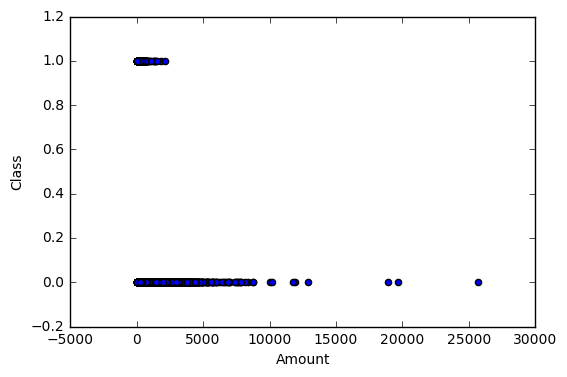

In [13]:
df.plot.scatter(x ='Amount',y='Class')

#### ^^^ Smaller amounts tend to be fraudulent cases

In [14]:
df.isnull().sum()
# No null/NA/NAN values in data set

Time      0
Amount    0
Class     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
dtype: int64

In [15]:
df.head(8336)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
5,2.0,3.67,0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,...,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080
6,4.0,4.99,0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,...,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168
7,7.0,40.80,0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,...,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339
8,7.0,93.20,0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,...,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404
9,9.0,3.68,0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,...,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076


#### Normalizing ' Amount feature - in line with other features

In [16]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1,1))
dff = df.drop(['Time', 'Amount'], axis = 1)
df.head(8336)

C:\Users\joisi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
5,2.0,3.67,0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556
6,4.0,4.99,0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279
7,7.0,40.80,0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107
8,7.0,93.20,0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392
9,9.0,3.68,0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516


In [17]:
cols = ['Time', 'Amount', 'normAmount', 'Class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'
, 'V13', 'V14', 'V15', 'V16', 'V17', 'V18' ,'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
 'V25', 'V26', 'V27', 'V28']
df = df[cols]
df.head()

,Time,Amount,normAmount,Class,V1,V2,V3,V4,V5,V6,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0.244964,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,-0.342475,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,1.160686,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,123.50,0.140534,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,69.99,-0.073403,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


#### Random split function | df1 = Training, df2 = Validation, df3 = Test

In [26]:
def split(data):
    from sklearn.model_selection import train_test_split as split
    df12, df3 = split(data, test_size=0.1, random_state = 100)
    df1, df2  = split(df12, test_size=0.2, random_state=100)
    return (df1, df2, df3)


### Data is very unbalanced!
A few thoughts - 


1. Data   
 1.1) Add more data - may not solve the underlying nature of the fradulent problem  
 1.2) Balance by resampling - under or over  

2. Measurement - how to measure accuracy?  
 2.1) AUC ROC curves - ratio of sensitivity vs specificity   
 2.3) Precision and Recall values for each set and model  
 In this case, Recall is more expensive than precision. That is, false negatives are more expensive than false positives. 

3. Models  
 3.1) Simple Logistic Regression  
 3.2) Stochastic Gradient Descent LR  
 3.3) Stratified KFold LR  
 3.4) Random Forest Classifier  

### 1. Create balanced data set

In [19]:
# Separate datasets into good and bad transactions
good_df = df[df['Class'] == 0]
bad_df = df[df['Class'] == 1]
total = df.shape
print (" Good rows", good_df.shape, "\n", "Bad rows ", bad_df.shape, "\n", "Total ", total)


 Good rows (284315, 32) 
 Bad rows  (492, 32) 
 Total  (284807, 32)


In [20]:
# 1.2) Majority class undersampling - pick 492 data points randomly from good_df set

percent_undersample = bad_df.shape[0]/total[0]*1.
print (percent_undersample)

from sklearn.model_selection import train_test_split as split
rest, bal_good_df = split(good_df, test_size = percent_undersample, random_state =0)
print (bal_good_df.shape)

0.001727485630620034
(492, 32)


In [21]:
# Create final set
df_bal = pd.concat([bal_good_df, bad_df])
print (" Good rows ", bal_good_df.shape, "\n", "Bad rows ", bad_df.shape, "\n", "Total ",df_bal.shape)


 Good rows  (492, 32) 
 Bad rows  (492, 32) 
 Total  (984, 32)


#### ^^^ Use df_bal as data set for brute force

#### However in a problem like this, having high recall is better than a balance of recall or precision. Since we want to accurately capture all fraudulent transactions, even if we misclassify a few good ones as bad, it is relatively harmless

### 2. Measurement accuracy function

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def howgood(model, data):
    
    # Split data set
    dftrain, dfvalid, dftest = split(data)
    
    # Data sets
    X_train = dftrain.drop(['Class'], axis=1)
    X_valid = dfvalid.drop(['Class'], axis=1)
    X_test  = dftest.drop(['Class'], axis=1)
    
    # True class
    y_true_train = dftrain['Class']
    y_true_valid = dfvalid['Class'] 
    y_true_test  = dftest['Class']
    
    # Predicted class
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)
    y_pred_test  = model.predict(X_test)
    
    # Measurement
    print ("Results")
    print ("~~~~~~~~")
    print ("Mean accuracy Train = ", round(model.score(X_train, y_true_train),3))
    print ("AUC Score Train     = ", round(roc_auc_score(y_true_train, y_pred_train),2))
    prec_train = precision_score(y_pred_train, y_true_train, average='binary')
    print ("Precision Train     = ", prec_train.max())
    rec_train = recall_score(y_pred_train, y_true_train, average='binary')
    print ("Recall Train        = ", rec_train.max())
    
    print ("\n")
    
    print ("Mean accuracy Valid = ", round(model.score(X_valid, y_true_valid),3))
    print ("AUC Score Valid     = ", round(roc_auc_score(y_true_valid, y_pred_valid),2))
    prec_valid = precision_score(y_pred_valid, y_true_valid, average='binary')
    print ("Precision Valid     = ", prec_valid.max())
    rec_valid = recall_score(y_pred_valid, y_true_valid, average='binary')
    print ("Recall Valid        = ", rec_valid.max())
    
    print ("\n")
    
    print ("Mean accuracy Test = ", round(model.score(X_test, y_true_test),3))
    print ("AUC Score Test     = ", round(roc_auc_score(y_true_test, y_pred_test),2))
    prec_test = precision_score(y_pred_test, y_true_test, average='binary')
    print ("Precision Test     = ", prec_test.max())
    rec_test = recall_score(y_pred_test, y_true_test, average='binary')
    print ("Recall Test        = ", rec_test.max())
    
    print ("\n")

#### Final balance data sets

In [192]:
(df1, df2, df3) = split(df_bal)
X = df1.drop(['Class'], axis=1)
y = df1['Class']

print (df1.shape, df2.shape, df3.shape, df_bal.shape)

(708, 32) (177, 32) (99, 32) (984, 32)


### 3.1) Stochastic Gradient Descent LR

In [136]:
from sklearn import linear_model

In [166]:
clf = linear_model.SGDClassifier(loss= 'log', penalty='elasticnet')

clf.fit(X,y)


howgood(clf, df_bal)
howgood(clf, df)

Results
~~~~~~~~
Mean accuracy Train =  0.499
AUC Score Train     =  0.5
Precision Train     =  0.0
Recall Train        =  0.0


Mean accuracy Valid =  0.463
AUC Score Valid     =  0.5
Precision Valid     =  0.0
Recall Valid        =  0.0


Mean accuracy Test =  0.576
AUC Score Test     =  0.5
Precision Test     =  0.0
Recall Test        =  0.0




C:\Users\joisi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Results
~~~~~~~~
Mean accuracy Train =  0.998
AUC Score Train     =  0.5
Precision Train     =  0.0
Recall Train        =  0.0


Mean accuracy Valid =  0.998
AUC Score Valid     =  0.5
Precision Valid     =  0.0
Recall Valid        =  0.0


Mean accuracy Test =  0.998
AUC Score Test     =  0.5
Precision Test     =  0.0
Recall Test        =  0.0




### 3.2) Regular Logistic Regression

#### Trained on resampled set and measured on both

In [170]:
(df1, df2, df3) = split(df_bal)
X = df1.drop(['Class'], axis=1)
y = df1['Class']

In [171]:
lr = linear_model.LogisticRegression()

lr.fit(X,y)

print ("~~~~~~~Balanced set accuracy~~~~~~~~~~~~~")
howgood(lr, df_bal)
print ("\n")

print ("~~~~~~~~~Full data set accuracy~~~~~~~~~~~~")
howgood(lr, df)


~~~~~~~Balanced set accuracy~~~~~~~~~~~~~
Results
~~~~~~~~
Mean accuracy Train =  0.955
AUC Score Train     =  0.95
Precision Train     =  0.932394366197
Recall Train        =  0.976401179941


Mean accuracy Valid =  0.927
AUC Score Valid     =  0.93
Precision Valid     =  0.915789473684
Recall Valid        =  0.945652173913


Mean accuracy Test =  0.859
AUC Score Test     =  0.85
Precision Test     =  0.809523809524
Recall Test        =  0.85




~~~~~~~~~Full data set accuracy~~~~~~~~~~~~
Results
~~~~~~~~
Mean accuracy Train =  0.966
AUC Score Train     =  0.95
Precision Train     =  0.923943661972
Recall Train        =  0.0454230715967


Mean accuracy Valid =  0.966
AUC Score Valid     =  0.94
Precision Valid     =  0.911111111111
Recall Valid        =  0.0447110141767


Mean accuracy Test =  0.965
AUC Score Test     =  0.93
Precision Test     =  0.893617021277
Recall Test        =  0.0410557184751




#### Trained on whole data set and measured on both

In [172]:
(df1, df2, df3) = split(df)
X = df1.drop(['Class'], axis=1)
y = df1['Class']

In [173]:
lr = linear_model.LogisticRegression()

lr.fit(X,y)

print ("~~~~~~~Balanced set accuracy~~~~~~~~~~~~~")
howgood(lr, df_bal)
print ("\n")

print ("~~~~~~~~~Full data set accuracy~~~~~~~~~~~~")
howgood(lr, df)


~~~~~~~Balanced set accuracy~~~~~~~~~~~~~
Results
~~~~~~~~
Mean accuracy Train =  0.777
AUC Score Train     =  0.78
Precision Train     =  0.554929577465
Recall Train        =  1.0


Mean accuracy Valid =  0.78
AUC Score Valid     =  0.79
Precision Valid     =  0.589473684211
Recall Valid        =  1.0


Mean accuracy Test =  0.788
AUC Score Test     =  0.75
Precision Test     =  0.5
Recall Test        =  1.0




~~~~~~~~~Full data set accuracy~~~~~~~~~~~~
Results
~~~~~~~~
Mean accuracy Train =  0.999
AUC Score Train     =  0.77
Precision Train     =  0.549295774648
Recall Train        =  0.870535714286


Mean accuracy Valid =  0.999
AUC Score Valid     =  0.78
Precision Valid     =  0.566666666667
Recall Valid        =  0.85


Mean accuracy Test =  0.999
AUC Score Test     =  0.8
Precision Test     =  0.595744680851
Recall Test        =  0.823529411765




### 3.3) LR using Stratified KFold split

In [179]:
from sklearn.model_selection import StratifiedKFold

In [180]:
skf = StratifiedKFold(n_splits = 5, random_state = 100, shuffle=True)
skf.get_n_splits(X,y)
print (skf)

StratifiedKFold(n_splits=5, random_state=100, shuffle=True)


In [184]:
#for train_indices, test_indices in skf:
#   lr = linear_model.LogisticRegression()
#   (lr.fit(x[train_indices], y[train_indices]).score(x[test_indices],y[test_indices])


### 3.4) RF Classification

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
# df = df.drop(['Pred_Class'],axis=1)
print (df.shape, df_bal.shape)

(284807, 32) (984, 32)


In [205]:
(df1, df2, df3) = split(df)
X = df1.drop(['Class'], axis=1)
y = df1['Class']

In [206]:
rfr = RandomForestClassifier()
rfr.fit(X,y)

print ("Balanced set accuracy")
howgood(rfr, df_bal)
print ("\n")
print ("Full data set accuracy")
howgood(rfr, df)

Balanced set accuracy
Results
~~~~~~~~
Mean accuracy Train =  0.955
AUC Score Train     =  0.95
Precision Train     =  0.90985915493
Recall Train        =  1.0


Mean accuracy Valid =  0.944
AUC Score Valid     =  0.95
Precision Valid     =  0.894736842105
Recall Valid        =  1.0


Mean accuracy Test =  0.949
AUC Score Test     =  0.94
Precision Test     =  0.880952380952
Recall Test        =  1.0




Full data set accuracy
Results
~~~~~~~~
Mean accuracy Train =  1.0
AUC Score Train     =  0.98
Precision Train     =  0.952112676056
Recall Train        =  1.0


Mean accuracy Valid =  0.999
AUC Score Valid     =  0.89
Precision Valid     =  0.788888888889
Recall Valid        =  0.910256410256


Mean accuracy Test =  0.999
AUC Score Test     =  0.88
Precision Test     =  0.765957446809
Recall Test        =  0.878048780488




### Create final output data frame with predicted values

In [207]:
final = df
print (final.shape)
X = df.drop(['Class'],axis=1)
final['Pred_Class'] = rfr.predict(X)

(284807, 32)


In [212]:
final.head()

,Time,Amount,normAmount,Class,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Pred_Class
0,0.0,149.62,0.244964,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,2.69,-0.342475,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,378.66,1.160686,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,123.50,0.140534,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,69.99,-0.073403,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### No probabilities in this output, since I chose RFR which is not a probabilistic classifier